## Results

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

### Input Size

/opt/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


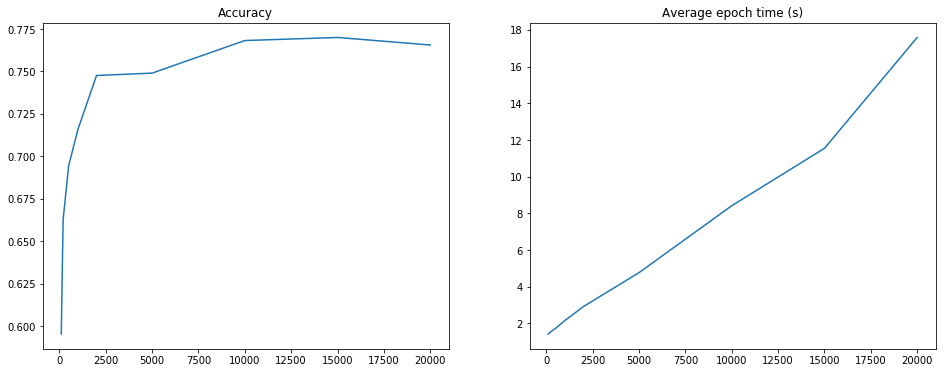

In [3]:
data_x = []
times = []
accuracy = []

experiment_path = '../experiments/input_size/'

for x in sorted(os.listdir(experiment_path), key=int):
    with open(os.path.join(experiment_path, x, 'training_metrics.json')) as f1, open(os.path.join(experiment_path, x, 'validation_metrics.json')) as f2:
            data_x.append(int(x))
            times.append(np.mean(json.load(f1)['time_history']))
            accuracy.append(json.load(f2)['accuracy'])

fig = plt.figure(figsize=(16, 6))

ax_1 = plt.subplot(121)
ax_1.set_title('Accuracy')
ax_1.plot(data_x, accuracy)
ax_2 = plt.subplot(122)
ax_2.set_title('Average epoch time (s)')
ax_2.plot(data_x, times)
fig.show()

plt.savefig('../figures/input_size.pgf')

### Number of layers

/home/filip/.conda/envs/inf5820/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


[0.702200686452655, 0.7090652130022209, 0.7165354330708661, 0.7032101756511205, 0.6898849182313749]


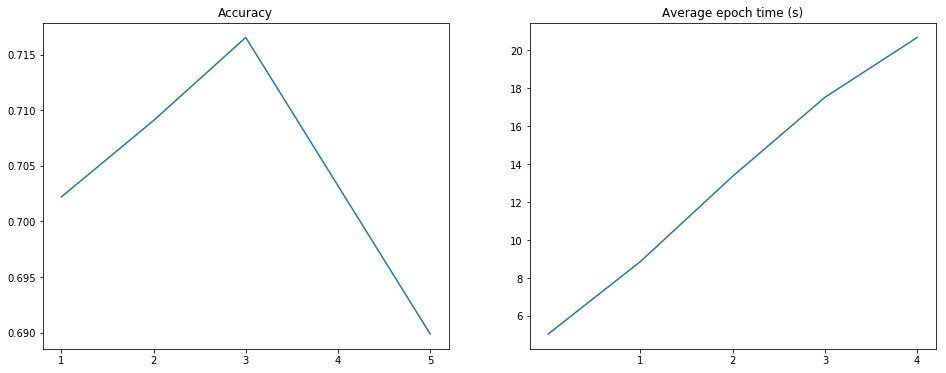

In [50]:
times = []
accuracy = []
nums = []

experiment_path = '../experiments/layers/'

for x in sorted(os.listdir(experiment_path), key=int):
    train_m_path = os.path.join(experiment_path, x, 'training_metrics.json')
    val_m_path = os.path.join(experiment_path, x, 'validation_metrics.json')
    
    if os.path.exists(train_m_path) and os.path.exists(val_m_path):
        with open(train_m_path) as f1, open(val_m_path) as f2:
                nums.append(int(x))
                times.append(np.mean(json.load(f1)['time_history']))
                accuracy.append(json.load(f2)['accuracy'])

fig = plt.figure(figsize=(16, 6))

ax_1 = plt.subplot(121)
ax_1.set_title('Accuracy')
ax_1.plot(nums, accuracy)
plt.xticks(nums)
ax_2 = plt.subplot(122)
ax_2.set_title('Average epoch time (s)')
plt.xticks(nums)
ax_2.plot(times)

fig.show()

print(accuracy)

plt.savefig('../figures/num_layers.pgf')

### Best Model Evaluation

In [53]:
def average_results(inputs, output):
    acc_list = []
    prec_list = []
    rec_list = []
    f1_list = []
    labels = None
    
    for x in inputs:
        with open(x, 'r') as f:
            r = json.load(f)
            labels = r['labels']
            acc_list.append(r['accuracy'])
            prec_list.append(r['precision'])
            rec_list.append(r['recall'])
            f1_list.append(r['f1'])

    results_mean = {
        'labels': labels,
        'accuracy': np.mean(acc_list).tolist(),
        'precision': np.mean(prec_list, 0).tolist(),
        'recall': np.mean(rec_list, 0).tolist(),
        'f1': np.mean(f1_list, 0).tolist()
    }
    
    results_std = {
        'labels': labels,
        'accuracy': np.std(acc_list).tolist(),
        'precision': np.std(prec_list, 0).tolist(),
        'recall': np.std(rec_list, 0).tolist(),
        'f1': np.std(f1_list, 0).tolist()
    }
    
    with open(output + '_average.json', 'w') as f1, open(output + '_std.json', 'w') as f2:
        json.dump(results_mean, f1)
        json.dump(results_std, f2)

In [54]:
average_results(['../experiments/best/validation_metrics_1.json', '../experiments/best/validation_metrics_2.json', '../experiments/best/validation_metrics_3.json'], '../experiments/best/dev')

In [55]:
average_results(['../experiments/best/test_metrics_1.json', '../experiments/best/test_metrics_2.json', '../experiments/best/test_metrics_3.json'], '../experiments/best/test')

In [48]:
def print_table(infile, outfile):
    with open(infile, 'r') as f_in, open(outfile, 'w') as f_out:
        results = json.load(f_in)
        df = pd.DataFrame(np.column_stack([
            results['labels'], 
            [round(x, 4) for x in results['precision']], 
            [round(x, 4) for x in results['recall']], 
            [round(x, 4) for x in results['f1']]]), columns=['classes', 'precision', 'recall', 'f1'])
        f_out.write(df.to_latex())

In [58]:
print_table('../experiments/best/dev_average.json', '../report/dev_average.tex')
print_table('../experiments/best/dev_std.json', '../report/dev_std.tex')

In [59]:
print_table('../experiments/best/test_average.json', '../report/test_average.tex')
print_table('../experiments/best/test_std.json', '../report/test_std.tex')